In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from efficientnet.tfkeras import EfficientNetB3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"genfortify","key":"485af2bc676a678f8d6a15c471cf65c6"}'}

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d riescoalieffe/Fruitmate

 88% 11.0M/12.6M [00:01<00:00, 9.79MB/s]
100% 12.6M/12.6M [00:01<00:00, 7.90MB/s]


In [ ]:
!unzip -qq /content/Fruitmate.zip

In [ ]:
#directory define
train_dir = '/content/Training'
validation_dir = '/content/Validation'
test_dir = '/content/Testing'

train_unripe_dir = os.path.join(train_dir, "Unripe")
train_ripe_dir = os.path.join(train_dir, "Ripe")
train_overripe_dir = os.path.join(train_dir, "Overripe")

validation_unripe_dir = os.path.join(validation_dir, "Unripe")
validation_ripe_dir = os.path.join(validation_dir, "Ripe")
validation_overripe_dir = os.path.join(validation_dir, "Overripe")

test_unripe_dir = os.path.join(test_dir, "Unripe")
test_ripe_dir = os.path.join(test_dir, "Ripe")
test_overripe_dir = os.path.join(test_dir, "Overripe")

In [ ]:
# Normalize image mode
# Get a list of all files in the image directory
train_unripe_list = os.listdir(train_unripe_dir)
train_ripe_list = os.listdir(train_ripe_dir)
train_overripe_list = os.listdir(train_overripe_dir)

validation_unripe_list = os.listdir(validation_unripe_dir)
validation_ripe_list = os.listdir(validation_ripe_dir)
validation_overripe_list = os.listdir(validation_overripe_dir)

test_unripe_list = os.listdir(test_unripe_dir)
test_ripe_list = os.listdir(test_ripe_dir)
test_overripe_list = os.listdir(test_overripe_dir)

# Iterate over each file in the directory
# Train section
# Unripe
for i in train_unripe_list:
    train_unripe_path = os.path.join(train_unripe_dir, i)
    train_unripe_image = Image.open(train_unripe_path)

    if train_unripe_image.format == 'PNG':
      if train_unripe_image.mode != 'RGBA':
        train_unripe_image.convert('RGBA').save(f'{i}2.png')

# Ripe
for i in train_ripe_list:
    train_ripe_path = os.path.join(train_ripe_dir, i)
    train_ripe_image = Image.open(train_ripe_path)

    if train_ripe_image.format == 'PNG':
      if train_ripe_image.mode != 'RGBA':
        train_ripe_image.convert('RGBA').save(f'{i}2.png')

# Overripe
for i in train_overripe_list:
    train_overripe_path = os.path.join(train_overripe_dir, i)
    train_overripe_image = Image.open(train_overripe_path)

    if train_overripe_image.format == 'PNG':
      if train_overripe_image.mode != 'RGBA':
        train_overripe_image.convert('RGBA').save(f'{i}2.png')

# Validation section
# Unripe
for i in validation_unripe_list:
    validation_unripe_path = os.path.join(validation_unripe_dir, i)
    validation_unripe_image = Image.open(validation_unripe_path)

    if validation_unripe_image.format == 'PNG':
      if validation_unripe_image.mode != 'RGBA':
        validation_unripe_image.convert('RGBA').save(f'{i}2.png')

#Ripe
for i in validation_ripe_list:
    validation_ripe_path = os.path.join(validation_ripe_dir, i)
    validation_ripe_image = Image.open(validation_ripe_path)

    if validation_ripe_image.format == 'PNG':
      if validation_ripe_image.mode != 'RGBA':
        validation_ripe_image.convert('RGBA').save(f'{i}2.png')

# Overripe
for i in validation_overripe_list:
    validation_overripe_path = os.path.join(validation_overripe_dir, i)
    validation_overripe_image = Image.open(validation_overripe_path)

    if validation_overripe_image.format == 'PNG':
      if validation_overripe_image.mode != 'RGBA':
        validation_overripe_image.convert('RGBA').save(f'{i}2.png')

# Test section
# Unripe
for i in test_unripe_list:
    test_unripe_path = os.path.join(test_unripe_dir, i)
    test_unripe_image = Image.open(test_unripe_path)

    if test_unripe_image.format == 'PNG':
      if test_unripe_image.mode != 'RGBA':
        test_unripe_image.convert('RGBA').save(f'{i}2.png')

# Ripe
for i in test_ripe_list:
    test_ripe_path = os.path.join(test_ripe_dir, i)
    test_ripe_image = Image.open(test_ripe_path)

    if test_ripe_image.format == 'PNG':
      if test_ripe_image.mode != 'RGBA':
        test_ripe_image.convert('RGBA').save(f'{i}2.png')

# Overripe
for i in test_overripe_list:
    test_overripe_path = os.path.join(test_overripe_dir, i)
    test_overripe_image = Image.open(test_overripe_path)

    if test_overripe_image.format == 'PNG':
      if test_overripe_image.mode != 'RGBA':
        test_overripe_image.convert('RGBA').save(f'{i}2.png')

In [ ]:
#Counting the number
print("The Number of Images in Training Set")
print('Total of Unripe Fruit:', len(os.listdir(train_unripe_dir)))
print('Total of Ripe Fruit:', len(os.listdir(train_ripe_dir)))
print('Total of Overripe Fruit:', len(os.listdir(train_overripe_dir)))

print("\nThe Number of Images in Validation Set")
print('Total of Unripe Fruit:', len(os.listdir(validation_unripe_dir)))
print('Total of Ripe Fruit:', len(os.listdir(validation_ripe_dir)))
print('Total of Overripe Fruit:', len(os.listdir(validation_overripe_dir)))

print("\nThe Number of Images in Test Set")
print('Total of Unripe Fruit:', len(os.listdir(test_unripe_dir)))
print('Total of Ripe Fruit:', len(os.listdir(test_ripe_dir)))
print('Total of Overripe Fruit:', len(os.listdir(test_overripe_dir)))

The Number of Images in Training Set
Total of Unripe Fruit: 263
Total of Ripe Fruit: 124
Total of Overripe Fruit: 62

The Number of Images in Validation Set
Total of Unripe Fruit: 19
Total of Ripe Fruit: 19
Total of Overripe Fruit: 19

The Number of Images in Test Set
Total of Unripe Fruit: 19
Total of Ripe Fruit: 19
Total of Overripe Fruit: 19


Sample of Unripe Apple:


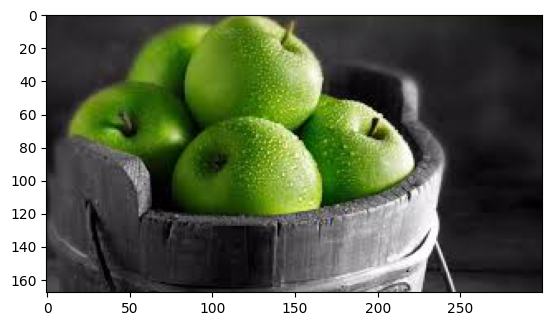


Sample of Ripe Apple:


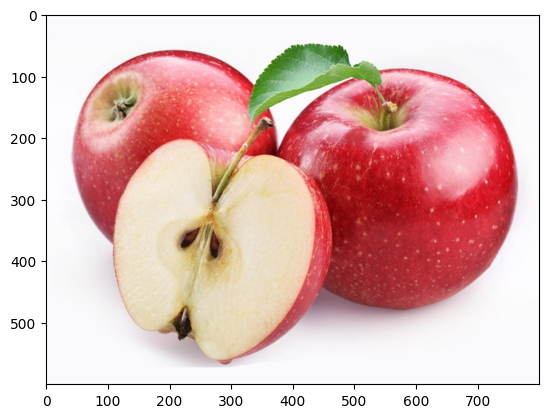


Sample of Overripe Apple:


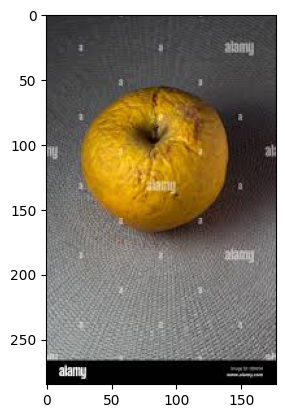

In [ ]:
#Showing Sample
print('Sample of Unripe Apple:')
plt.imshow(load_img(f"{os.path.join(train_unripe_dir, os.listdir(train_unripe_dir)[0])}"))
plt.show()

print('\nSample of Ripe Apple:')
plt.imshow(load_img(f"{os.path.join(train_ripe_dir, os.listdir(train_ripe_dir)[0])}"))
plt.show()

print('\nSample of Overripe Apple:')
plt.imshow(load_img(f"{os.path.join(train_overripe_dir, os.listdir(train_overripe_dir)[0])}"))
plt.show()

In [ ]:
#image augmentation
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)
  train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 44,
                                                      class_mode = 'categorical',
                                                      target_size = (150, 150))
  
  validation_datagen    = ImageDataGenerator(rescale = 1./255.)
  validation_generator  = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                                batch_size = 5,
                                                                class_mode = 'categorical',
                                                                target_size = (150, 150))
  
  testing_datagen   = ImageDataGenerator(rescale = 1./255.)
  testing_generator = testing_datagen.flow_from_directory(directory = TESTING_DIR,
                                                          batch_size = 5,
                                                          class_mode = 'categorical',
                                                          target_size = (150, 150))
  
  return train_generator, validation_generator, testing_generator

In [ ]:
train_generator, validation_generator, testing_generator = train_val_generators(train_dir, validation_dir, test_dir)

Found 449 images belonging to 3 classes.
Found 57 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [ ]:
#Pre-trained Model 

def create_pretrained_model():
  pretrained_model = EfficientNetB3(include_top=False,
                                   weights="imagenet",
                                   input_shape=(150, 150, 3))

  for layer in pretrained_model.layers:
    layer.trainable = False

  return pretrained_model

In [ ]:
pretrained_model = create_pretrained_model()

44107200/44107200 [==============================] - 1s 0us/step


In [ ]:
def output_of_last_layer(pretrained_model):
  last_desired_layer = pretrained_model.get_layer('top_activation') 
  print('Last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('Last layer output: ', last_output)
  
  return last_output

In [ ]:
last_output = output_of_last_layer(pretrained_model)

Last layer output shape:  (None, 5, 5, 1536)
Last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1536), dtype=tf.float32, name=None), name='top_activation/mul:0', description="created by layer 'top_activation'")


In [ ]:
#create the model 
def create_model(pretrained_model, last_output):
  x = layers.Conv2D(2048, (2,2), activation = 'relu')(last_output)
  x = layers.Conv2D(1024, (2,2), activation = 'relu')(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation = 'relu')(x)
  x = layers.Dropout(0.6)(x)
  x = layers.Dense(256, activation = 'relu')(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(3, activation = 'softmax')(x)

  model = Model(inputs=pretrained_model.input, outputs=x)

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model
     

In [ ]:
model = create_model(pretrained_model, last_output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 40)   1080        ['input_1[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 40)   160         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 75, 75, 40)   0           ['stem_bn[0][0]']            

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
loss = model.evaluate(testing_generator, steps=10)